# Data Wrangling

### Table of contents
* [1.1 Intorduction](#1.1_Introduction)
    * [1.2 Purpose](#1.2_Purpose)
    * [1.3 Approach](#1.3_Approach)
* [2.1 Explore the data](#2.1)
    * [2.2 Removing extra data](#2.2)
* [3.1 Summary](#3.1_Summary)

##### 1.1 Introduction: <a id='1.1_Introduction'></a>

According to the Centers for Disease Control (CDC), in the United States, congenital heart defects (CHDs) are the most common types of birth defects. CHDs affect nearly 1% of children born, totalling nearly 40,000 cases per year. Of those 1% of children born with CHDs, about 25% have a critical CHD. Infants with critical CHDs will need surgery within their first year of life in order to prevent unnecessary death. Children in the fetal stage of development can also suffer from in-utero hypoxia - and even death - if certain fetal cardiac issues are not detected in time.

Cardiotocography (CTG) is a non-invasive medical test used to assess fetal heart rhythm, as well as uterine contractions in the mother. Obstetricians use information acquired from CTG to assess fetal health, make determinations about the necessity of preventative C-sections, and inform parents about possible health issues which may require surgical intervention for the child.

Currently, highly-trained physicians are required for the reading of CTG data, where they determine if the fetus’ CTG reading class (a.k.a. Fetal CTG Class) is normal, suspect, or pathologic (N, S, or P, respectively). An accurate determination is a critical step for parents, obstetricians, surgeons, and hospitals in terms of preparedness for medical intervention (C-section to save the life of the fetus, possible cardiac surgery in the first year of life after birth, etc.)

##### 1.2 Purpose<a id='1.2_Purpose'></a>

Using CTG data obtained from the research paper, Ayres de Campos et al. [1], and the UCI Machine Learning Laboratory [2], we aim to build several models that can be trained to accurately predict the Fetal CTG Class from an input characterizing a CTG.

[1] Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318.

[2] Ayres de Campos et al. (2000). UCI Machine Learning Repository . Irvine, CA: University of California, School of Information and Computer Science. https://archive.ics.uci.edu/ml/datasets/cardiotocography


##### 1.3 Approach<a id='1.3_Approach'></a>

The plan is to use several supervised machine learning algorithms to predict the classification of our main target, based on the features of the CTG reading:

LB - FHR baseline (beats per minute)
AC - # of accelerations per second
FM - # of fetal movements per second
UC - # of uterine contractions per second
DL - # of light decelerations per second
DS - # of severe decelerations per second
DP - # of prolonged decelerations per second
ASTV - percentage of time with abnormal short term variability
MSTV - mean value of short term variability
ALTV - percentage of time with abnormal long term variability
MLTV - mean value of long term variability
Width - width of FHR histogram
Min - minimum of FHR histogram
Max - Maximum of FHR histogram
Nmax - # of histogram peaks
Nzeros - # of histogram zeros
Mode - histogram mode
Mean - histogram mean
Median - histogram median
Variance - histogram variance
Tendency - histogram tendency

While the dependent variable will be our categorical target:
NSP - Fetal CTG Class (N=normal; S=suspect; P=pathologic)

The available dataset also provides an alternative target, known as the FHR Pattern Class Code, which is a number between 1 and 10. We will explore the use of this target as well.

Multiple classification algorithms will be used and they will be compared with respect to appropriate performance metrics. We will also explore so-called ensemble methods [3, 4].

Finally, we will explore some interpretability approaches to characterize how the variation of independent variables affect the target/s [5]


[3] https://machinelearningmastery.com/tour-of-ensemble-learning-algorithms/

[4] https://sebastianraschka.com/pdf/lecture-notes/stat479fs18/07_ensembles_slides.pdf

[5] https://christophm.github.io/interpretable-ml-book/


##### 2.1 Explore the data<a id='2.1'></a>

In [1]:
# import needed modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
fileloc = r'C:\Users\Joseph Shire\Documents\Springboard Python Data Science\Python Scripts\springboard\Capstone2\Fetal health idea\CTG.xls'

In [3]:
# load our file for inspection
file = pd.ExcelFile(fileloc)

In [4]:
# inspect sheet names
file.sheet_names

['Description', 'Data', 'Raw Data']

In [5]:
# import the cardiotocography excel file, specifically the 'Raw Data' sheet
ctg_file = pd.read_excel(fileloc, sheet_name = 'Raw Data')

In [6]:
# check the column names and data types
ctg_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   FileName  2126 non-null   object        
 1   Date      2126 non-null   datetime64[ns]
 2   SegFile   2126 non-null   object        
 3   b         2126 non-null   float64       
 4   e         2126 non-null   float64       
 5   LBE       2126 non-null   float64       
 6   LB        2126 non-null   float64       
 7   AC        2126 non-null   float64       
 8   FM        2127 non-null   float64       
 9   UC        2127 non-null   float64       
 10  ASTV      2127 non-null   float64       
 11  MSTV      2127 non-null   float64       
 12  ALTV      2127 non-null   float64       
 13  MLTV      2127 non-null   float64       
 14  DL        2128 non-null   float64       
 15  DS        2128 non-null   float64       
 16  DP        2128 non-null   float64       
 17  DR        2128

In [7]:
# get the shape of the data
ctg_file.shape

(2130, 40)

In [8]:
# visualize the data
ctg_file.head(10)


,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,Fmcs_1.txt,1996-05-03,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
6,Fmcs_2.txt,1996-05-03,CTG0006.txt,0.0,953.0,134.0,134.0,1.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
7,Fmcs_2.txt,1996-05-03,CTG0007.txt,240.0,953.0,134.0,134.0,1.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0,3.0
8,Hasc_1.txt,1995-02-22,CTG0008.txt,62.0,679.0,122.0,122.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0
9,Hasc_1.txt,1995-02-22,CTG0009.txt,120.0,779.0,122.0,122.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0


In [9]:
# count missing values
missing = pd.concat([ctg_file.isnull().sum(), 100 * ctg_file.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by="count" ,ascending=False)

,count,%
FileName,4,0.187793
Date,4,0.187793
Nzeros,4,0.187793
Mode,4,0.187793
Mean,4,0.187793
Median,4,0.187793
Variance,4,0.187793
Tendency,4,0.187793
A,4,0.187793
B,4,0.187793


This seems to be a case of "extra values" instead of "missing values" based on the uniformity of the missingness.
All of the known important columns (FileName, Date, Mean/Median/Mode) are said to be 'missing' 4 values, so all columns should theoretically have 4 fewer values than the height of the data (2130).

Threfore, we will remove any row not containing a file name, which is a logical choice as exclusion criteria (no file name = not included)

In [10]:

ctg_file.drop(ctg_file[ctg_file["FileName"].isnull()].index, inplace=True)


In [11]:
# Re-check the shape to ensure it has 2126 rows
ctg_file.shape

(2126, 40)

In [12]:
# visualize again
ctg_file.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
5,Fmcs_1.txt,1996-05-03,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


Our target feature is 'NSP', and another possible target is 'CLASS'
Both are categorical variables.

In [13]:
# Inspection:

ctg_file['NSP'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: NSP, dtype: int64

In [14]:
ctg_file['CLASS'].value_counts()

2.0     579
1.0     384
6.0     332
7.0     252
10.0    197
8.0     107
4.0      81
5.0      72
9.0      69
3.0      53
Name: CLASS, dtype: int64

We will call the `hist` method to plot histograms of each of the numeric features to visualize distributions for each feature

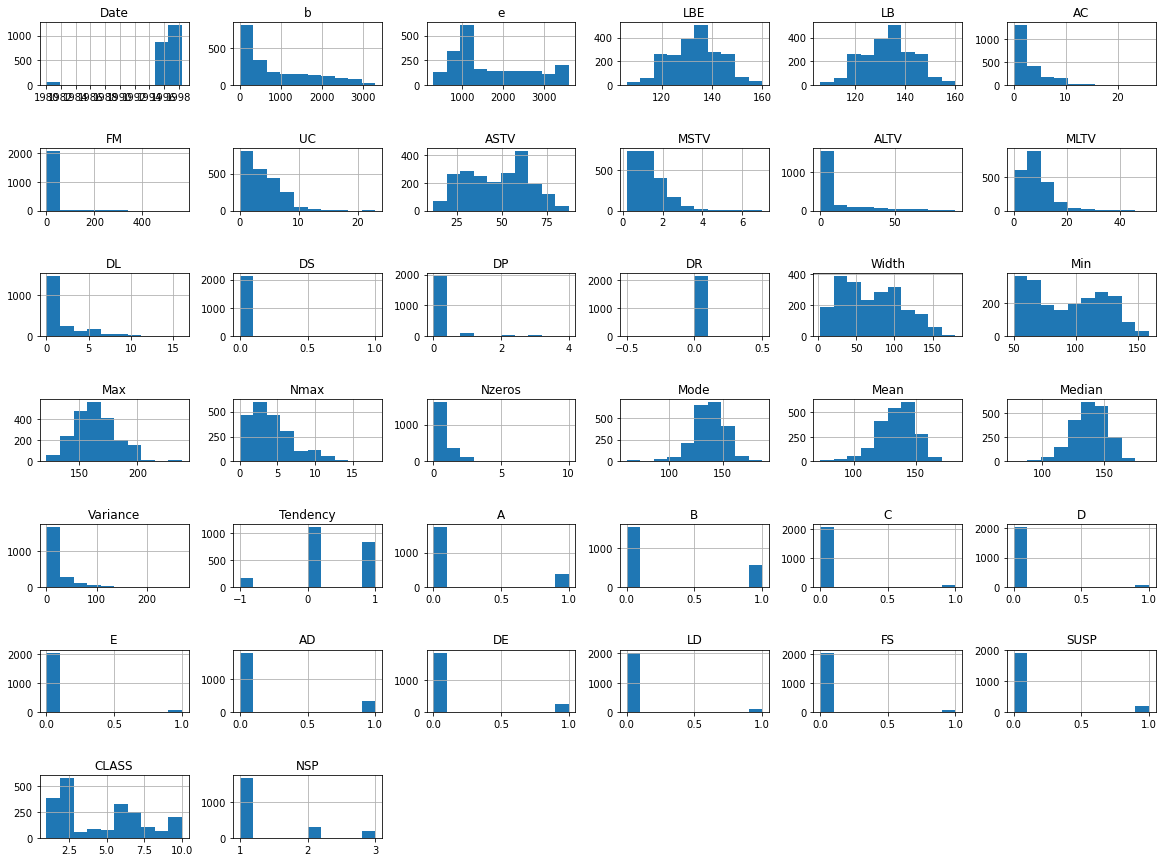

In [15]:

ctg_file.hist(figsize=(20,15))
plt.subplots_adjust(hspace=1.0);
# the terminating ';' fixes some messy output

In [16]:
# Checking to see if there are any unique values
ctg_file["DR"].value_counts()

0.0    2126
Name: DR, dtype: int64

In [17]:
# Checking to see if there are any unique values
ctg_file["DS"].value_counts()

0.0    2119
1.0       7
Name: DS, dtype: int64

After reaching out to the original researchers to inquire what the other columns signify, we did not receive any response. Due to these circumstances, we will need to eliminate all other columns

##### 2.2 Removing extra data<a id='2.2'></a>

In [18]:
ctg = ctg_file

cut = ["FileName","Date","b","e","LBE","DR","SegFile","A","B","C","D","E","AD","DE","LD","FS","SUSP"]

ctg = ctg_file.loc[:, ~ctg_file.columns.isin(cut)]
ctg.head()

,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
1,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,...,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,9.0,2.0
2,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,...,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,6.0,1.0
3,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,...,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,6.0,1.0
4,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,...,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,6.0,1.0
5,132.0,4.0,0.0,5.0,16.0,2.4,0.0,19.9,0.0,0.0,...,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,2.0,1.0


In [19]:
# double check for missing values
missing = pd.concat([ctg.isnull().sum(), 100 * ctg.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by="count" ,ascending=False)

,count,%
LB,0,0.0
Min,0,0.0
CLASS,0,0.0
Tendency,0,0.0
Variance,0,0.0
Median,0,0.0
Mean,0,0.0
Mode,0,0.0
Nzeros,0,0.0
Nmax,0,0.0


In [20]:
# final check of the data we wrangled and cleaned before advancing to next steps (1/3)
ctg.iloc[:,0:7].describe()

,LB,AC,FM,UC,ASTV,MSTV,ALTV
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000
mean,133.303857,2.722484,7.241298,3.659925,46.990122,1.332785,9.84666
std,9.840844,3.560850,37.125309,2.847094,17.192814,0.883241,18.39688
min,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000
25%,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.00000
50%,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.00000
75%,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.00000
max,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,91.00000


In [21]:
# final check of the data we wrangled and cleaned before advancing to next steps (2/3)
ctg.iloc[:,8:15].describe()

,DL,DS,DP,Width,Min,Max,Nmax
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,1.570085,0.003293,0.126058,70.445908,93.579492,164.025400,4.068203
std,2.499229,0.057300,0.464361,38.955693,29.560212,17.944183,2.949386
min,0.000000,0.000000,0.000000,3.000000,50.000000,122.000000,0.000000
25%,0.000000,0.000000,0.000000,37.000000,67.000000,152.000000,2.000000
50%,0.000000,0.000000,0.000000,67.500000,93.000000,162.000000,3.000000
75%,3.000000,0.000000,0.000000,100.000000,120.000000,174.000000,6.000000
max,16.000000,1.000000,4.000000,180.000000,159.000000,238.000000,18.000000


In [22]:
# final check of the data we wrangled and cleaned before advancing to next steps (3/3)
ctg.iloc[:,16:].describe()

,Mode,Mean,Median,Variance,Tendency,CLASS,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,137.452023,134.610536,138.090310,18.808090,0.320320,4.509878,1.304327
std,16.381289,15.593596,14.466589,28.977636,0.610829,3.026883,0.614377
min,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000,1.000000
25%,129.000000,125.000000,129.000000,2.000000,0.000000,2.000000,1.000000
50%,139.000000,136.000000,139.000000,7.000000,0.000000,4.000000,1.000000
75%,148.000000,145.000000,148.000000,24.000000,1.000000,7.000000,1.000000
max,187.000000,182.000000,186.000000,269.000000,1.000000,10.000000,3.000000


We export the finalized data for future use as a .csv file

In [23]:
f = r'C:\Users\Joseph Shire\Documents\Springboard Python Data Science\Python Scripts\springboard\Capstone2\Fetal health idea\ctg.csv'
ctg.to_csv(f)

##### 3.1 Summary<a id='3.1_Summary'></a>

The data was loaded, inspected, cleaned, saved, and is now ready for exploratory data analysis. There are no more missing values, and the only columns still in the dataset are necessary for proper classification modelling.

The next step (in a different notebook) will be exploratory data analysis. Already, it appears that we will need to use dummy encoding (pandas 'get_dummies' method) in order to transform our categorical NSP target into '0 or 1' variables comprising 3 columns (one for each outcome possibility: N, S, or P).